# Association Rule Mining

In [37]:
library(arules)
library(dplyr)

In [2]:
par(family ="NanumBarunGothic")

In [3]:
tr <- read.delim("dataTransactions.tab", stringsAsFactors=FALSE)
head(tr)

,datetime,custid,store,product,brand,corner,import,amount,installment
1,2000-05-01 10:43,18313,신촌점,4104840008000,샤넬,화장품,1,113000,3
2,2000-05-01 11:00,18313,신촌점,2.7e+12,식품,일반식품,0,91950,3
3,2000-05-01 11:33,27222,신촌점,4545370944500,까사미아,가구,0,598000,3
4,2000-05-01 11:43,27222,신촌점,4500860043900,대아통상,기타,0,20100,1
5,2000-05-01 11:53,27222,신촌점,4538130048700,토이플러스,문화완구,0,24000,1
6,2000-05-01 12:00,27222,신촌점,4406010020474,베베,유아동복,0,28000,1


 - 일반식품, 화장품 제외 
  - 가장 많이 팔린 Data 
  - 돌려봐야 계속 나오게 된다.
 - Custid와 Corner 가 중복이 되지 않도록 추출.

In [4]:
tr.filter <- tr %>%
  filter(!(corner %in% c("일반식품","화장품"))) %>%
  distinct(custid, corner)

Warning message:
: failed to assign NativeSymbolInfo for lhs since lhs is already defined in the 'lazyeval' namespaceWarning message:
: failed to assign NativeSymbolInfo for rhs since rhs is already defined in the 'lazyeval' namespace

In [5]:
head(tr.filter)

,custid,corner
1,27222,가구
2,27222,기타
3,27222,문화완구
4,27222,유아동복
5,47084,스포츠
6,31090,스포츠


 - Custid별로 corner 데이터를 짤라 List로 형성.

In [6]:
head(split(tr.filter$corner, tr.filter$custid))

$`10070`
[1] "유니캐주얼"   "캐릭터캐주얼" "유아동복"     "장신구"       "영캐주얼"    
[6] "스포츠"       "니트단품"    

$`10139`
[1] "스포츠"         "영캐주얼"       "엘레강스캐주얼" "문화완구"      
[5] "섬유"           "타운모피"       "유아동복"      

$`10208`
 [1] "유아동복"         "문화완구"         "니트단품"         "트래디셔널캐주얼"
 [5] "유니캐주얼"       "장신구"           "조리욕실"         "가전"            
 [9] "섬유"             "스포츠"           "영캐주얼"         "도자기크리스탈"  
[13] "가구"             "기타"             "캐릭터캐주얼"     "침구수예"        
[17] "타운모피"         "피혁"            

$`10275`
[1] "캐릭터캐주얼" "니트단품"     "정장셔츠"    

$`10350`
[1] "문화완구"         "트래디셔널캐주얼" "섬유"             "스포츠"          
[5] "유니캐주얼"       "캐릭터캐주얼"     "장신구"          

$`10425`
[1] "피혁"     "니트단품"

In [7]:
# custid별로 corner를 자른다. 
trans <- as(split(tr.filter$corner, tr.filter$custid), "transactions") #transactions 메소드 
trans 

transactions in sparse format with
 487 transactions (rows) and
 24 items (columns)

In [8]:
# trans <- read.transactions("dataTransactions.tab", format = "single", sep="\t", cols = c(2,6), skip=1) 
# 일반식품, 화장품 제거없이 하려면 위와 같이 해도 상관 없다.

## Example of Transactions from a Matrix

In [9]:
a_matrix <- matrix(
      c(1,1,1,0,0,
    1,1,0,0,0,
    1,1,0,1,0,
    0,0,1,0,1,
    1,1,0,1,1), ncol = 5)

In [10]:
dimnames(a_matrix) <-  list(
    c("a","b","c","d","e"),
    paste("Tr",c(1:5), sep = ""))

a_matrix

,Tr1,Tr2,Tr3,Tr4,Tr5
a,1,1,1,0,1
b,1,1,1,0,1
c,1,0,0,1,0
d,0,0,1,0,1
e,0,0,0,1,1


 - Transactions : count of rows 
  - 사용자의 수라고 보면 될 것같다. ( 위의 데이터에 )
 - Items : count of columns 
  - 아이템 수

In [11]:
trans2 <-  as(a_matrix, "transactions")
trans2 

transactions in sparse format with
 5 transactions (rows) and
 5 items (columns)

 - 각 사용자가 포함한 Item을 list형태로 ( R의 list는 아님 ) 만들어 놓음. 집합 형태로 

In [12]:
inspect(trans2) 

    items             transactionID
[1] {Tr1,Tr2,Tr3,Tr5} a            
[2] {Tr1,Tr2,Tr3,Tr5} b            
[3] {Tr1,Tr4}         c            
[4] {Tr3,Tr5}         d            
[5] {Tr4,Tr5}         e            


## Example of transaction from data.frame

In [13]:
a_df <- data.frame(
    age = as.factor(c(6,8,7,6,9,5)), 
    grade = as.factor(c(1,3,1,1,4,1)))  

In [14]:
a_df

,age,grade
1,6,1
2,8,3
3,7,1
4,6,1
5,9,4
6,5,1


In [15]:
trans3 <- as(a_df, "transactions") 
inspect(trans3)

    items           transactionID
[1] {age=6,grade=1} 1            
[2] {age=8,grade=3} 2            
[3] {age=7,grade=1} 3            
[4] {age=6,grade=1} 4            
[5] {age=9,grade=4} 5            
[6] {age=5,grade=1} 6            


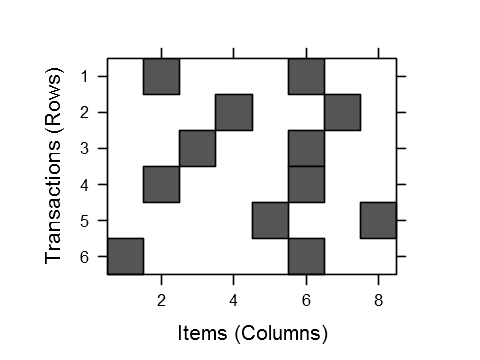

In [16]:
options(repr.plot.width=4,repr.plot.height=3)
image(trans3)

# Continue Lectures

In [17]:
inspect(trans[1:2])

    items                                                             
[1] {니트단품,스포츠,영캐주얼,유니캐주얼,유아동복,장신구,캐릭터캐주얼}
[2] {문화완구,섬유,스포츠,엘레강스캐주얼,영캐주얼,유아동복,타운모피}  
    transactionID
[1] 10070        
[2] 10139        


 - size(trans) each transaction length

In [18]:
transactionInfo(trans[size(trans) > 20])

,transactionID
84,15968
420,42322


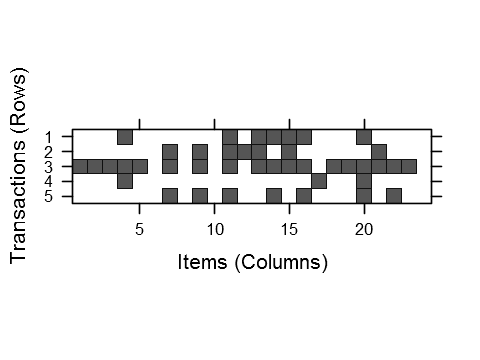

In [19]:
image(trans[1:5])

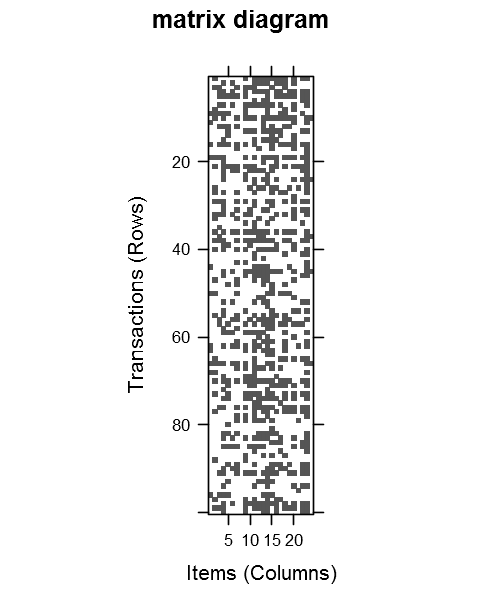

In [20]:
options(repr.plot.width=4,repr.plot.height=5)
image(sample(trans, 100, replace = FALSE), main = "matrix diagram") # Sampling 

 - Table()과 동일한 결과를 출력한다.

In [21]:
t(itemFrequency(trans, type="absolute"))

가구,가전,기타,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,수입명품,...,유아동복,장신구,정장셔츠,조리욕실,침구수예,캐릭터캐주얼,타운모피,트래디셔널캐주얼,피혁,행사장
41,140,95,258,105,74,158,3,259,107,...,222,178,149,165,74,212,33,189,323,13


In [22]:
table(tr.filter$corner)


            가구             가전             기타         니트단품 
              41              140               95              258 
  도자기크리스탈   디자이너부띠끄         문화완구         생활용품 
             105               74              158                3 
            섬유         수입명품           스포츠   엘레강스캐주얼 
             259              107              281              163 
        영캐주얼       유니캐주얼         유아동복           장신구 
             235              266              222              178 
        정장셔츠         조리욕실         침구수예     캐릭터캐주얼 
             149              165               74              212 
        타운모피 트래디셔널캐주얼             피혁           행사장 
              33              189              323               13 

In [23]:
t(round(itemFrequency(trans)[order(itemFrequency(trans), decreasing = TRUE)],2))

피혁,스포츠,유니캐주얼,섬유,니트단품,영캐주얼,유아동복,캐릭터캐주얼,트래디셔널캐주얼,장신구,...,가전,수입명품,도자기크리스탈,기타,디자이너부띠끄,침구수예,가구,타운모피,행사장,생활용품
0.66,0.58,0.55,0.53,0.53,0.48,0.46,0.44,0.39,0.37,...,0.29,0.22,0.22,0.2,0.15,0.15,0.08,0.07,0.03,0.01


In [43]:
options(repr.plot.width=4,repr.plot.height=4)
itemFrequencyPlot(trans, support=0.2, cex.names=0.8,family = "HYsanB")

<img src="photo/1.PNG" width=600>

In [44]:
itemFrequencyPlot(trans, topN = 20, main = "support top 20 items")

<img src="photo/2.PNG" width =600>

 - rules <- apriori(trans, parameter=list(support=0.2, confidence=0.8), appearance=list(rhs="스포츠",default="lhs")) 
 - 결과에 스포츠만 만든다.

In [26]:
rules <- apriori(trans, parameter=list(support=0.2, confidence=0.8))
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 97 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 487 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [70 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 70 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 1 40 29 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     3.4     4.0     4.0 

summary of quality measures:
    support         confidence          lift      
 Min.   :0.2012   Min.   :0.8000   Min.   :1.233  
 1st Qu.:0.2115   1st Qu.:0.8182   1st Qu.:1.283  
 Median :0.2259   Median :0.8413   Median :1.353  
 Mean   :0.2341   Mean   :0.8444   Mean   :1.383  
 3rd Qu.:0.2464   3rd Qu.:0.8624   3rd Qu.:1.463  
 Max.   :0.3265   Max.   :0.9160   Max.   :1.696  

mining info:
  data ntransactions support confidence
 trans           487     0.2        0.8

 rule1 | rule2 | rule3
 ------|-------|------
 2 | 3 | 4
 1 | 40 | 29
 a->b |a+b->c |a+b+c->d

In [27]:
inspect(rules)

     lhs                                     rhs          support   confidence
[1]  {트래디셔널캐주얼}                   => {피혁}       0.3264887 0.8412698 
[2]  {스포츠,엘레강스캐주얼}              => {피혁}       0.2012320 0.8596491 
[3]  {스포츠,조리욕실}                    => {피혁}       0.2053388 0.8403361 
[4]  {조리욕실,피혁}                      => {스포츠}     0.2053388 0.8196721 
[5]  {영캐주얼,장신구}                    => {피혁}       0.2012320 0.8596491 
[6]  {유니캐주얼,장신구}                  => {피혁}       0.2012320 0.8521739 
[7]  {니트단품,장신구}                    => {섬유}       0.2032854 0.8114754 
[8]  {니트단품,장신구}                    => {피혁}       0.2114990 0.8442623 
[9]  {섬유,장신구}                        => {피혁}       0.2156057 0.8333333 
[10] {스포츠,장신구}                      => {피혁}       0.2114990 0.8306452 
[11] {영캐주얼,트래디셔널캐주얼}          => {유니캐주얼} 0.2053388 0.8264463 
[12] {영캐주얼,트래디셔널캐주얼}          => {니트단품}   0.2094456 0.8429752 
[13] {영캐주얼,트래디셔널캐주얼}          => {스포츠}     0.2053388 0.8264463 
[14] {영캐주얼,트래디셔널캐주얼}          => {

 - 뻔한 얘기들이 많이 나온다. 
  - 즉, Level Down이 필요하다.

In [28]:
inspect(sort(rules, by = "lift")[1:30])

     lhs                                   rhs          support   confidence
[1]  {니트단품,섬유,유니캐주얼}         => {영캐주얼}   0.2032854 0.8181818 
[2]  {니트단품,스포츠,유니캐주얼}       => {영캐주얼}   0.2114990 0.8174603 
[3]  {영캐주얼,트래디셔널캐주얼}        => {니트단품}   0.2094456 0.8429752 
[4]  {섬유,영캐주얼,피혁}               => {니트단품}   0.2258727 0.8396947 
[5]  {섬유,영캐주얼,유니캐주얼}         => {니트단품}   0.2032854 0.8250000 
[6]  {스포츠,영캐주얼,피혁}             => {유니캐주얼} 0.2381930 0.8467153 
[7]  {니트단품,스포츠,영캐주얼}         => {유니캐주얼} 0.2114990 0.8442623 
[8]  {섬유,스포츠,영캐주얼}             => {니트단품}   0.2012320 0.8099174 
[9]  {니트단품,장신구}                  => {섬유}       0.2032854 0.8114754 
[10] {니트단품,트래디셔널캐주얼}        => {섬유}       0.2135524 0.8062016 
[11] {영캐주얼,트래디셔널캐주얼}        => {유니캐주얼} 0.2053388 0.8264463 
[12] {니트단품,스포츠,영캐주얼}         => {섬유}       0.2012320 0.8032787 
[13] {섬유,영캐주얼}                    => {니트단품}   0.2546201 0.8000000 
[14] {니트단품,유니캐주얼,피혁}         => {섬유}       0.2258727 0.8029197 
[15] {스포츠,영캐주얼}                  => {유

In [29]:
rules.target <- subset(rules, rhs %in% "스포츠" & lift > 1.4)

In [30]:
inspect(sort(rules.target, by="confidence"))

     lhs                                   rhs      support   confidence
[1]  {유니캐주얼,트래디셔널캐주얼,피혁} => {스포츠} 0.2094456 0.8500000 
[2]  {영캐주얼,트래디셔널캐주얼}        => {스포츠} 0.2053388 0.8264463 
[3]  {섬유,영캐주얼,유니캐주얼}         => {스포츠} 0.2032854 0.8250000 
[4]  {니트단품,영캐주얼,유니캐주얼}     => {스포츠} 0.2114990 0.8240000 
[5]  {조리욕실,피혁}                    => {스포츠} 0.2053388 0.8196721 
[6]  {섬유,영캐주얼,피혁}               => {스포츠} 0.2197125 0.8167939 
[7]  {섬유,유니캐주얼,피혁}             => {스포츠} 0.2361396 0.8156028 
[8]  {니트단품,트래디셔널캐주얼}        => {스포츠} 0.2156057 0.8139535 
[9]  {유니캐주얼,트래디셔널캐주얼}      => {스포츠} 0.2299795 0.8115942 
[10] {니트단품,유니캐주얼,피혁}         => {스포츠} 0.2279261 0.8102190 
     lift    
[1]  1.473132
[2]  1.432311
[3]  1.429804
[4]  1.428071
[5]  1.420571
[6]  1.415582
[7]  1.413518
[8]  1.410660
[9]  1.406571
[10] 1.404187


In [31]:
rule.interest <- subset(rules, items %in% c("장신구", "섬유"))
inspect(rule.interest[1:10])

     lhs                            rhs      support   confidence lift    
[1]  {영캐주얼,장신구}           => {피혁}   0.2012320 0.8596491  1.296127
[2]  {유니캐주얼,장신구}         => {피혁}   0.2012320 0.8521739  1.284857
[3]  {니트단품,장신구}           => {섬유}   0.2032854 0.8114754  1.525824
[4]  {니트단품,장신구}           => {피혁}   0.2114990 0.8442623  1.272928
[5]  {섬유,장신구}               => {피혁}   0.2156057 0.8333333  1.256450
[6]  {스포츠,장신구}             => {피혁}   0.2114990 0.8306452  1.252397
[7]  {니트단품,트래디셔널캐주얼} => {섬유}   0.2135524 0.8062016  1.515908
[8]  {섬유,트래디셔널캐주얼}     => {스포츠} 0.2217659 0.8000000  1.386477
[9]  {섬유,트래디셔널캐주얼}     => {피혁}   0.2340862 0.8444444  1.273203
[10] {섬유,유아동복}             => {피혁}   0.2114990 0.8174603  1.232518


In [32]:
write(rules.target, file="arules.csv", sep=",", row.name=F)

In [33]:
library(pmml) # 세계 표준 문서

Warning message:
: package 'pmml' was built under R version 3.3.2Loading required package: XML


In [34]:
write.PMML(rules.target, file = "arules.xml")

[1] "arules.xml"

## Visualize Association Rules using arulesViz package

In [36]:
library(arulesViz)

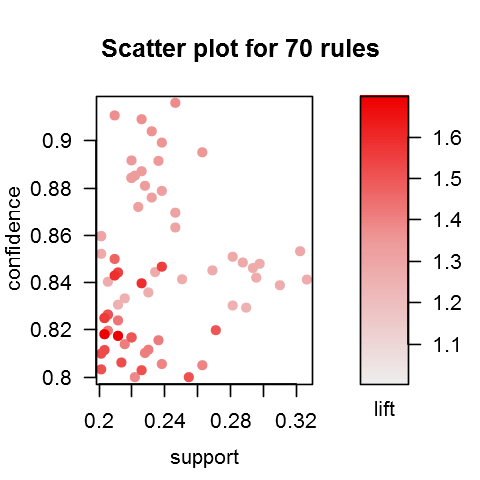

In [38]:
plot(rules)

In [40]:
plot(sort(rules, by = "lift")[1:20], method = "grouped")

<img src="photo/3.PNG" width=600>

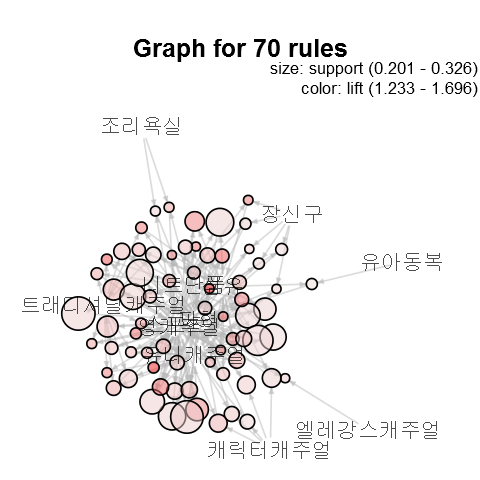

In [41]:
plot(rules, method = "graph", control = list(type="items"))

# Exercise

In [46]:
data <- read.delim("shoppingmall.txt", stringsAsFactors=FALSE)
st <- as.matrix(data[,-1])
trans <- as(st, "transactions")

In [47]:
inspect(trans[1:20])

     items                                 
[1]  {heel,shorts}                         
[2]  {heel,flat}                           
[3]  {heel,flat,shorts}                    
[4]  {heel,jacket,jewelry}                 
[5]  {heel}                                
[6]  {heel,jewelry,shorts,blous}           
[7]  {heel,jewelry}                        
[8]  {heel}                                
[9]  {heel,jacket,shorts,blous}            
[10] {heel}                                
[11] {heel}                                
[12] {heel,tee,skirt,jacket,jewelry,shorts}
[13] {heel}                                
[14] {heel,shorts,blous}                   
[15] {heel}                                
[16] {heel,skirt}                          
[17] {heel}                                
[18] {heel,shorts}                         
[19] {heel,jewelry,blous}                  
[20] {heel,knit,blous}                     
